In [18]:
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [19]:
weight=0.7
bias=0.3
X=torch.arange(0,1,0.02).unsqueeze(dim=1) #start,end ,step
Y=weight*X+bias

In [20]:
X[: 10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [21]:
Y[: 10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [22]:
len(X)

50

In [23]:
len(Y)

50

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
len(X_train),len(X_test)

(40, 10)

# Create Model

In [26]:
class LinearModel_0(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x):
    return self.weight*x+self.bias

model_0=LinearModel_0()
model_0

LinearModel_0()

In [27]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [28]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Loss ANd Optimizer

In [29]:
loss_0=nn.MSELoss()
optimizer=torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Train Model

In [30]:
torch.manual_seed(42)
epochs=100
train_loss=[]
test_loss=[]
epoch_count=[]

for epoch in range(epochs):
  model_0.train()
  pred=model_0(X_train)
  loss=loss_0(pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(X_test)
    test_loss_list=loss_0(test_pred,y_test.type(torch.float))

    if epoch%10==0:
      epoch_count.append(epoch)
      train_loss.append(loss.item())
      test_loss.append(test_loss_list.item())
      print(f"Epoch : {epoch} | Train Loss : {loss:.2f} | Test Loss : {test_loss_list:.2f}")


Epoch : 0 | Train Loss : 0.13 | Test Loss : 0.15
Epoch : 10 | Train Loss : 0.12 | Test Loss : 0.14
Epoch : 20 | Train Loss : 0.11 | Test Loss : 0.13
Epoch : 30 | Train Loss : 0.10 | Test Loss : 0.12
Epoch : 40 | Train Loss : 0.09 | Test Loss : 0.11
Epoch : 50 | Train Loss : 0.08 | Test Loss : 0.10
Epoch : 60 | Train Loss : 0.07 | Test Loss : 0.09
Epoch : 70 | Train Loss : 0.07 | Test Loss : 0.08
Epoch : 80 | Train Loss : 0.06 | Test Loss : 0.07
Epoch : 90 | Train Loss : 0.05 | Test Loss : 0.07


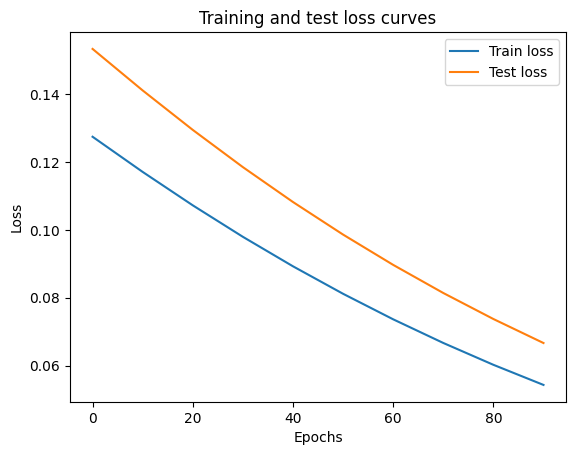

In [31]:
# Plot the loss curves
plt.plot(epoch_count, train_loss, label="Train loss")
plt.plot(epoch_count, test_loss, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [32]:
predicted=model_0(X_test)

In [33]:
predicted

tensor([[0.3320],
        [0.5551],
        [0.4779],
        [0.6066],
        [0.3663],
        [0.6323],
        [0.4436],
        [0.4350],
        [0.4950],
        [0.3835]], grad_fn=<AddBackward0>)

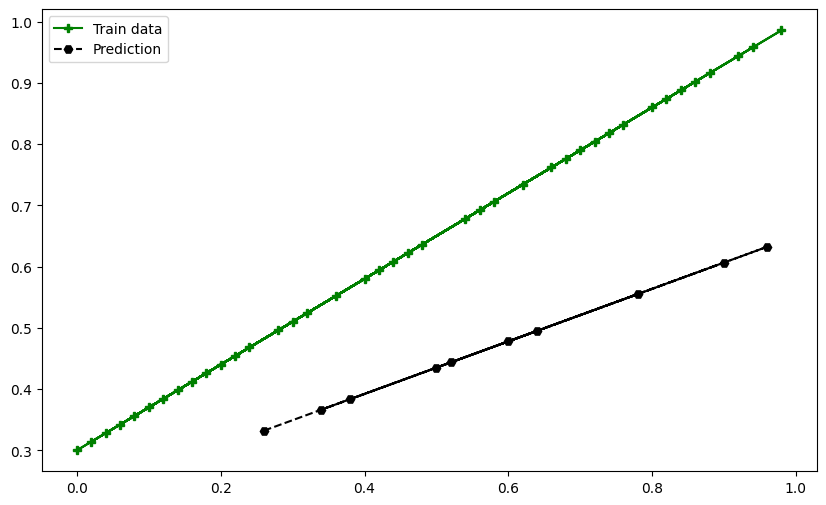

In [34]:
plt.figure(figsize=(10,6))
plt.plot(X_train,y_train,color="green",marker="P",label="Train data")
plt.plot(X_test,predicted.detach().numpy(),color="black",marker="H",linestyle="--",label="Prediction")
plt.legend(loc="best")
plt.show()

# Save Model

In [37]:
from pathlib import Path
model_path=Path("Model")
model_path.mkdir(parents=True,exist_ok=True)
model_name="first_model_save.pth"
model_save_path=model_path/model_name

print(f"Saving model to : {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

Saving model to : Model/first_model_save.pth


# Load Save Model

In [38]:
load_model=LinearModel_0()
load_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [39]:
load_model.eval()
with torch.inference_mode():



  load_model_pred=load_model(X_test)

In [40]:
predicted==load_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])